In [1]:
import re
import pandas as pd
import numpy as np

## Ekkolodd data processing

In [2]:
# Set column names
ekko_col_names = ['data', 'sample start time']
ekkolodd_df = pd.read_csv('raw/ekkolodd.txt', names=ekko_col_names, header=None)

In [3]:
# Split after confidence
ekkolodd_df['data'] = ekkolodd_df['data'].str.split(r'\%')

In [4]:
# separate to rows
ekkolodd_df = ekkolodd_df.explode('data')

In [5]:
# split distance and confidence
ekkolodd_df['data'] = ekkolodd_df['data'].str.split(r'\t')

In [6]:
# drop all data values that are not distance:xx, confidence:xx
ekkolodd_df = ekkolodd_df[ekkolodd_df.apply(lambda x: True if len(x.data) == 2 else False, axis=1)]

In [7]:
# split distance and confidence to columns
ekkolodd_df['distance'], ekkolodd_df['confidence'] = zip(*ekkolodd_df['data'])

In [8]:
# only keep the integer and set the column type
ekkolodd_df['confidence'] = ekkolodd_df['confidence'].str.replace(r'[^0-9]', '').astype(int)
ekkolodd_df['distance'] = ekkolodd_df['distance'].str.replace(r'[^0-9]', '').astype(int)

C:\Users\Ferdi\AppData\Local\Temp\ipykernel_5740\4058848018.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ekkolodd_df['confidence'] = ekkolodd_df['confidence'].str.replace(r'[^0-9]', '').astype(int)
C:\Users\Ferdi\AppData\Local\Temp\ipykernel_5740\4058848018.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ekkolodd_df['distance'] = ekkolodd_df['distance'].str.replace(r'[^0-9]', '').astype(int)


In [9]:
# remove the data column as we now have two new columns
ekkolodd_df.drop(['data'], axis=1, inplace=True)

In [10]:
# paste the latest sample time value to the NaN cells
ekkolodd_df['sample start time'] = ekkolodd_df['sample start time'].fillna(ekkolodd_df['sample start time'].dropna().iloc[-1])

In [11]:
# save to csv file
ekkolodd_df.to_csv('data/ekkolodd.csv', index=False)

In [12]:
ekkolodd_df

,sample start time,distance,confidence
1,09 Aug 2022 13:15:16 +0000,6751,100
1,09 Aug 2022 13:15:16 +0000,6751,100
1,09 Aug 2022 13:15:16 +0000,6751,100
1,09 Aug 2022 13:15:16 +0000,6751,100
1,09 Aug 2022 13:15:16 +0000,6751,100
...,...,...,...
77,25 Aug 2022 10:28:29 +0000,6227,0
77,25 Aug 2022 10:28:29 +0000,6227,0
77,25 Aug 2022 10:28:29 +0000,6722,0
77,25 Aug 2022 10:28:29 +0000,6722,0


## Gyroscope data processing

In [117]:
with open('gyroskop.txt') as f:
    gyroskop_raw = f.read().splitlines()

gyroskop = []
for line in gyroskop_raw:
    gyroskop.append(re.split('\), \(', line))

gyroskop

[['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ['[]'],
 ["[('$ISDPT,0000.000,M,000.0000,B', '0', '0'",
  "'$ISDPT,-000.264,M,000.9906,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9963,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9962,B', '0', '0'",
  "'$ISDPT,-000.208,M,000.9962,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,000.9961,B', '0', '0'",
  "'$ISDPT,-000.210,M,00

In [112]:
for val in gyroskop[6]:
    print(re.split(', ', re.sub('\(','',val)))

["['$ISDPT,0000.000,M,000.0000,B'", "'0'", "'0'"]
["'$ISDPT,-000.264,M,000.9906,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9963,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9962,B'", "'0'", "'0'"]
["'$ISDPT,-000.208,M,000.9962,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,M,000.9961,B'", "'0'", "'0'"]
["'$ISDPT,-000.210,

## Trykksensor data processing

In [88]:
with open('trykksensor.txt') as f:
    trykksensor_raw = f.read().splitlines()

trykksensor = []
for line in trykksensor_raw:
    trykksensor.append(re.split("\\\\r\\\\n", re.sub("'b'",'',line)))

## Data generation

In [198]:
def get_ID123_a(size):
   df = pd.DataFrame()
   depth = np.random.uniform(0, 40, size)
   df['depth'] = depth
   pressure = depth * 9.81 + np.random.normal(0, 2, size)
   df['pressure'] = pressure
   temperature = -np.log(depth+0.1) * 4.5 + 23
   temperature = np.clip(temperature, 2.5, 19)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   return df

In [199]:
temp_df = get_ID123_a(1000)
temp_df.to_csv('data/ID123-1000.csv', index=False)

<AxesSubplot: >

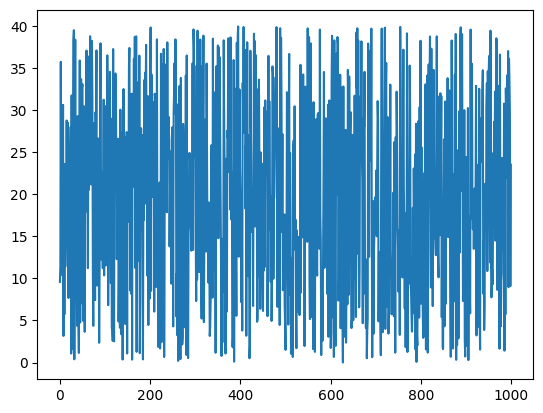

In [204]:
temp_df['depth'].plot()

### Sinus time-based depth 

In [289]:
def get_ID123_b(size=100):
   df = pd.DataFrame()
   sinus = np.sin(np.arange(0,size/5, 0.2)) * 2 + 25
   depth = sinus + np.random.normal(0, 3, size)
   depth += np.random.choice([0, 2, -5], size=size, p=[0.8, 0.15, 0.05])
   depth_day = np.random.randint(0, 100)
   for i in range(size//168 + 1):
      depth[i*168+depth_day:i*168+depth_day+3] -= 22
   # clip to avoid - values
   depth = np.clip(depth, 0, 50)
   df['depth'] = depth
   pressure = depth * 9.81 + np.random.normal(0, 3, size)
   df['pressure'] = pressure
   temperature = -np.log(depth+0.1) * 3.5 + 18
   temperature = np.clip(temperature, 2.5, 15)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   return df

<AxesSubplot: >

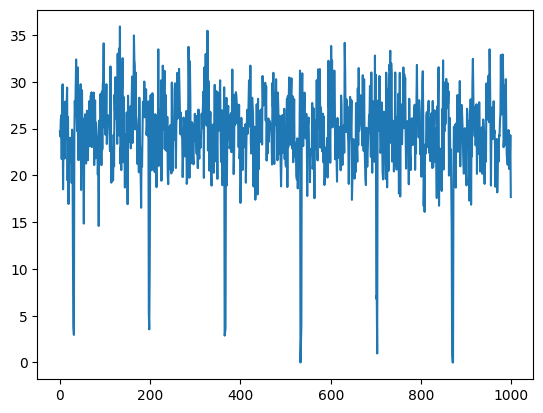

In [332]:
temp_df = get_ID123_b(1000)
temp_df.to_csv('data/ID123-b-1000.csv')
temp_df['depth'].plot()

In [317]:
a = temp_df.sort_values(by = 'depth').reset_index()

<AxesSubplot: >

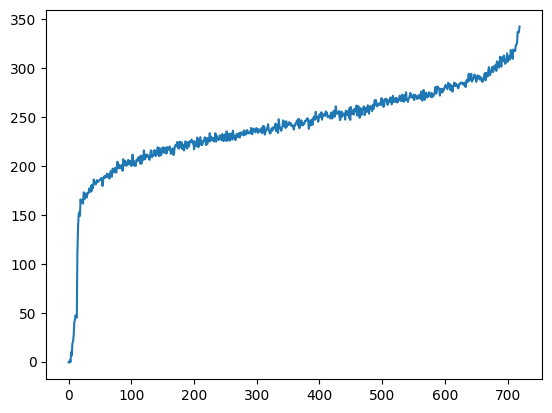

In [331]:
a['pressure'].plot()

### Full data

In [335]:
oilfields = np.array(['Frigg', 'Magnus', 'Troll', 'Gullfaks', 'Viking', 'Snorre'])

In [336]:
def get_ID123_c(field: str, id: int, size=100):
   df = pd.DataFrame()
   
   field_col = np.array([field]*size)
   df['field'] = field_col

   id_col = np.ones(size) * id
   df['id'] = id_col

   sinus = np.sin(np.arange(0,size/5, 0.2)) * 2 + 25
   depth = sinus + np.random.normal(0, 3, size)
   depth += np.random.choice([0, 2, -5], size=size, p=[0.8, 0.15, 0.05])
   depth_day = np.random.randint(0, 100)
   for i in range(size//168 + 1):
      depth[i*168+depth_day:i*168+depth_day+3] -= 22
   # clip to avoid - values
   depth = np.clip(depth, 0, 50)
   df['depth'] = depth

   pressure = depth * 9.81 + np.random.normal(0, 3, size)
   df['pressure'] = pressure

   temperature = -np.log(depth+0.1) * 3.5 + 18
   temperature = np.clip(temperature, 2.5, 15)
   temperature += np.random.normal(0, 0.2, size)
   df['temperature'] = temperature

   return df

In [337]:
SIZE = 1000
id100 = get_ID123_c(np.random.choice(oilfields), 1, SIZE)
for i in range(2, 10):
    id100 = pd.concat(id100, get_ID123_c(np.random.choice(oilfields), i, SIZE))

AttributeError: 'DataFrame' object has no attribute 'vstack'